Unsupervised Learning
====
1. Regularization, Overfitting and Feature Selection
1. Primary Component Analysis and Dimensional Reduction
1. Unsupervised Learning Techniques

Setup
----

In [2]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## Strategy for Regression Residual from Azure ML
1. Download all Parqeut files with raw predictions
    1. _Score Models_ from Training split
    1. _Score Models_ from Testing split
1. Append both queries into one query in Power BI
1. Create DAX  for Absolute Error ( Actual - target column)
    1. DAX Columns
        1. Residual = Actual - "Scored Labels"
        1. Absolute Error = ABS(Residual)
        1. Absolute Pct Err = DIVIDE(Absolute Error,Actual )
    1. Mean Absolute Error = ABS(Residual)
    1. Absolute Pct Err = DIVIDE(Absolute Error,Actual )
1. Create an odd number of equal size residual error bins
1. Export as CSV from POwer BI using DAX Studio

Deploy and Maintain Assets in Power BI
Model the Data in DAX and Power BI
Prepare the Data in Power Query
Visualize and Analyze the Data in POwer BI

In [3]:
df = pd.read_csv("housingprices.csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Scored Labels,Residual,Residual (bins),Absolute error
0,0.141878,0.000000,RL,NaN,0.052317,Pave,NaN,IR1,Lvl,AllPub,...,0.000000,0.272727,0.50,WD,Normal,141000,144310.671150,-3310.671150,-3727.969738,3310.671150
1,0.984236,0.000000,RL,60.0,0.035991,Pave,NaN,Reg,Lvl,AllPub,...,0.000000,0.363636,0.25,WD,Normal,120500,116965.526095,3534.473905,-3727.969738,3534.473905
2,0.189856,0.000000,RL,140.0,0.083377,Pave,NaN,Reg,Lvl,AllPub,...,0.000000,0.454545,1.00,WD,Normal,141000,100277.077143,40722.922857,36885.381639,40722.922857
3,0.187800,0.000000,RL,76.0,0.032784,Pave,NaN,Reg,Lvl,AllPub,...,0.000000,0.454545,0.25,WD,Normal,124500,134441.276562,-9941.276562,-44341.321116,9941.276562
4,0.678547,0.235294,RL,82.0,0.038103,Pave,NaN,Reg,Lvl,AllPub,...,0.000000,0.454545,0.00,WD,Normal,348000,318183.556043,29816.443957,-3727.969738,29816.443957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,0.400274,0.176471,RM,51.0,0.022529,Pave,NaN,Reg,Lvl,AllPub,...,0.000000,0.545455,0.75,WD,Normal,133000,134508.861404,-1508.861404,-3727.969738,1508.861404
434,0.522961,0.235294,RL,82.0,0.038000,Pave,NaN,Reg,Lvl,AllPub,...,0.000000,0.545455,0.75,WD,Normal,337000,314312.796829,22687.203171,-3727.969738,22687.203171
435,0.349554,0.000000,RL,75.0,0.061974,Pave,NaN,Reg,Lvl,AllPub,...,0.129032,0.454545,0.75,WD,Normal,164900,159921.981446,4978.018554,-3727.969738,4978.018554
436,0.973955,0.588235,RL,53.0,0.012821,Pave,NaN,Reg,Lvl,AllPub,...,0.000000,0.545455,1.00,WD,Normal,127500,158159.498600,-30659.498600,-44341.321116,30659.498600


In [11]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438 entries, 0 to 437
Data columns (total 85 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               438 non-null    float64
 1   MSSubClass       438 non-null    float64
 2   MSZoning         438 non-null    object 
 3   LotFrontage      359 non-null    float64
 4   LotArea          438 non-null    float64
 5   Street           438 non-null    object 
 6   Alley            22 non-null     object 
 7   LotShape         438 non-null    object 
 8   LandContour      438 non-null    object 
 9   Utilities        438 non-null    object 
 10  LotConfig        438 non-null    object 
 11  LandSlope        438 non-null    object 
 12  Neighborhood     438 non-null    object 
 13  Condition1       438 non-null    object 
 14  Condition2       438 non-null    object 
 15  BldgType         438 non-null    object 
 16  HouseStyle       438 non-null    object 
 17  OverallQual     

In [12]:
from sklearn.model_selection import train_test_split
X = pd.get_dummies(df.drop([ 'SalePrice', 'Scored Labels', 'Residual',
       'Residual (bins)', 'Absolute error'], axis = 1))
y =df[["SalePrice"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [19]:
(0.7*3223)+(0.3*17326)

7453.9

In [17]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
# map the hyperparamters to the best fit from Azure Ml into sklearn
reg = GradientBoostingRegressor(random_state=0)
scores = cross_val_score(reg, X, y, cv=10,scoring='mean_absolute_error')
print("mean: {}".format(scores.mean()))
print("std: {}".format(scores.std(ddof=0)))
print("coefficient of variance: {} %".format(100*(scores.std(ddof=0)/scores.mean())))
#reg.fit(X, y)

mean: nan
std: nan
coefficient of variance: nan %


C:\Users\andre\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\andre\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\andre\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_gb.py", line 409, in fit
    X, y = self._validate_data(X, y, accept_sparse=['csr', 'csc', 'coo'],
  File "C:\Users\andre\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\andre\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py", line 72, in inner_f
    return f(**kwargs)
  File "C:\Users\andre\AppData\Roaming\Python\Python39\s

In [16]:
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [12]:
df_mini= df.drop(labels = ['Id', 'SalePrice', 'Scored Labels', 'Residual',
       'Absolute error'], axis= 1)
       

In [15]:
df[['Residual (bins)']].value_counts()

Residual (bins)
-3727.969738       243
-44341.321116      169
 36885.381639       17
-84954.672494        6
 77498.733017        1
 118112.084395       1
 158725.435773       1
dtype: int64

In [13]:
df_mini.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438 entries, 0 to 437
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MSSubClass       438 non-null    float64
 1   MSZoning         438 non-null    object 
 2   LotFrontage      359 non-null    float64
 3   LotArea          438 non-null    float64
 4   Street           438 non-null    object 
 5   Alley            22 non-null     object 
 6   LotShape         438 non-null    object 
 7   LandContour      438 non-null    object 
 8   Utilities        438 non-null    object 
 9   LotConfig        438 non-null    object 
 10  LandSlope        438 non-null    object 
 11  Neighborhood     438 non-null    object 
 12  Condition1       438 non-null    object 
 13  Condition2       438 non-null    object 
 14  BldgType         438 non-null    object 
 15  HouseStyle       438 non-null    object 
 16  OverallQual      438 non-null    float64
 17  OverallCond     

In [63]:
df_prep_pca = df_mini.drop(labels= ['Residual (bins)'],axis= 1)

In [64]:
df_prep_pca = pd.get_dummies(df_prep_pca)
df_prep_pca.shape

(438, 392)

In [22]:
set(df.dtypes)

{dtype('bool'), dtype('int64'), dtype('float64'), dtype('O')}

In [21]:
set(df_prep_pca.dtypes)

{dtype('bool'), dtype('uint8'), dtype('float64')}

In [19]:
df_prep_pca.head(5)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.000000,NaN,0.052317,0.333333,0.500,0.637681,0.166667,0.074238,0.207598,0.160531,...,0,0,0,1,0,0,0,0,1,0
1,0.000000,60.0,0.035991,0.333333,0.625,0.717391,0.350000,0.109142,0.000000,0.106164,...,0,0,0,1,0,0,0,0,1,0
2,0.000000,140.0,0.083377,0.333333,0.500,0.572464,0.016667,0.021262,0.000000,0.318493,...,0,0,0,1,0,0,0,0,1,0
3,0.000000,76.0,0.032784,0.444444,0.750,0.797101,0.533333,0.096740,0.000000,0.115582,...,0,0,0,1,0,0,0,0,1,0
4,0.235294,82.0,0.038103,0.777778,0.500,0.905797,0.800000,0.190291,0.000000,0.137842,...,0,0,0,1,0,0,0,0,1,0


In [98]:
[(df.columns[n], df.dtypes[n]) for n in range(len(df.columns))]

[('Id', dtype('float64')),
 ('MSSubClass', dtype('float64')),
 ('MSZoning', dtype('O')),
 ('LotFrontage', dtype('float64')),
 ('LotArea', dtype('float64')),
 ('Street', dtype('O')),
 ('Alley', dtype('O')),
 ('LotShape', dtype('O')),
 ('LandContour', dtype('O')),
 ('Utilities', dtype('O')),
 ('LotConfig', dtype('O')),
 ('LandSlope', dtype('O')),
 ('Neighborhood', dtype('O')),
 ('Condition1', dtype('O')),
 ('Condition2', dtype('O')),
 ('BldgType', dtype('O')),
 ('HouseStyle', dtype('O')),
 ('OverallQual', dtype('float64')),
 ('OverallCond', dtype('float64')),
 ('YearBuilt', dtype('float64')),
 ('YearRemodAdd', dtype('float64')),
 ('RoofStyle', dtype('O')),
 ('RoofMatl', dtype('O')),
 ('Exterior1st', dtype('O')),
 ('Exterior2nd', dtype('O')),
 ('MasVnrType', dtype('O')),
 ('MasVnrArea', dtype('O')),
 ('ExterQual', dtype('O')),
 ('ExterCond', dtype('O')),
 ('Foundation', dtype('O')),
 ('BsmtQual', dtype('O')),
 ('BsmtCond', dtype('O')),
 ('BsmtExposure', dtype('O')),
 ('BsmtFinType1', dtyp

In [18]:
df_prep_pca.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=392)

In [26]:
df_prep_pca.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,438.000000,359.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,...,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000
mean,0.211859,69.740947,0.042572,0.553272,0.568208,0.724059,0.577093,0.078653,0.036423,0.232588,...,0.004566,0.002283,0.057078,0.904110,0.061644,0.002283,0.009132,0.018265,0.851598,0.057078
std,0.255489,22.830497,0.047051,0.143097,0.129990,0.201328,0.333313,0.072509,0.116262,0.183823,...,0.067496,0.047782,0.232256,0.294778,0.240783,0.047782,0.095235,0.134061,0.355904,0.232256
min,0.000000,21.000000,0.000000,0.222222,0.125000,0.094203,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,57.000000,0.029295,0.444444,0.500000,0.601449,0.300000,0.000000,0.000000,0.092466,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.176471,69.000000,0.038164,0.555556,0.500000,0.724638,0.716667,0.071049,0.000000,0.184075,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.294118,80.000000,0.047144,0.666667,0.625000,0.920290,0.883333,0.120881,0.000000,0.345676,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,174.000000,0.763561,1.000000,1.000000,0.992754,1.000000,0.284550,0.759837,0.828339,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [56]:
set(df_prep_pca.dtypes)

{dtype('bool'), dtype('uint8'), dtype('float64')}

In [66]:
df[['Residual (bins)']]

,Residual (bins)
0,-3727.969738
1,-3727.969738
2,36885.381639
3,-44341.321116
4,-3727.969738
...,...
433,-3727.969738
434,-3727.969738
435,-3727.969738
436,-44341.321116


In [65]:
#df_prep_pca
from sklearn.decomposition import PCA
pca = PCA(2)  # project from 64 to 2 dimensions
df_prep_pca_projected = pca.fit_transform(df_prep_pca)
print(df_prep_pca.shape)
print(df_prep_pca_projected.shape)

(438, 392)
(438, 2)


In [24]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


In [29]:
df_prep_pca.columns[0]

'MSSubClass'

In [73]:
df[['colormap']].value_counts()

colormap                          
<map object at 0x000001177D41B190>    438
dtype: int64

In [68]:
df[['Residual (bins)']].value_counts()

Residual (bins)
-3727.969738       243
-44341.321116      169
 36885.381639       17
-84954.672494        6
 77498.733017        1
 118112.084395       1
 158725.435773       1
dtype: int64

In [79]:
 df['Residual (bins)']

0      -3727.969738
1      -3727.969738
2      36885.381639
3     -44341.321116
4      -3727.969738
           ...     
433    -3727.969738
434    -3727.969738
435    -3727.969738
436   -44341.321116
437    -3727.969738
Name: Residual (bins), Length: 438, dtype: float64

In [87]:
colormap = {-84954.672494:0,
-44341.321116:1,
-3727.969738:2,
 36885.381639:3,
 77498.733017:4,
 118112.084395:5,
 158725.435773:6}
df['colormap'] = ((round(df['Residual (bins)']/1000)+85)/40).astype(int)
df.colormap.value_counts()

2    243
1    169
3     17
0      6
4      1
5      1
6      1
Name: colormap, dtype: int64

In [78]:
type(colormap)

dict

In [76]:
 df['Residual (bins)'].dtype

dtype('float64')

In [96]:
len(df)

438

In [95]:
[f for f in df.isna().sum()]

[0,
 0,
 0,
 79,
 0,
 0,
 416,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 13,
 13,
 13,
 13,
 0,
 13,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 212,
 22,
 22,
 22,
 0,
 0,
 22,
 22,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 437,
 352,
 417,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [42]:
col_hasnaissue = [1 if d > 0 else 0 for d in df_mini.isna().sum()]
isnaset = {col if col_hasnaissue[col] == 1 else None   for col in range(len(col_hasnaissue))}
colset = list(isnaset)
colset.remove(None)
colset

[32, 2, 34, 58, 5, 71, 72, 73, 63, 62, 24, 57, 56, 59, 29, 30, 31]

In [52]:
df_mini.dtypes[colset]

BsmtFinType1     object
LotFrontage     float64
BsmtFinType2     object
GarageYrBlt     float64
Alley            object
PoolQC           object
Fence            object
MiscFeature      object
GarageCond       object
GarageQual       object
MasVnrType       object
GarageType       object
FireplaceQu      object
GarageFinish     object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
dtype: object

<AxesSubplot:>

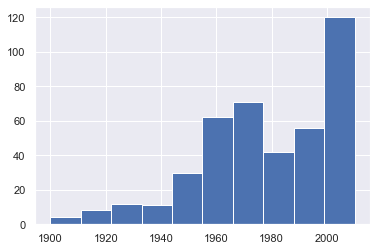

In [60]:
df_mini.GarageYrBlt.hist()

<AxesSubplot:>

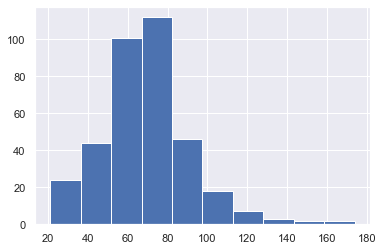

In [53]:
df_mini.LotFrontage.hist()

In [ ]:
print(df_mini.LotFrontage.mean())
print(df_mini.LotFrontage.median())

In [61]:
print(df_mini.GarageYrBlt.mean())
print(df_mini.GarageYrBlt.median())

1977.6322115384614
1977.0


In [59]:
df_mini.LotFrontage.fillna(df_mini.LotFrontage.mean(), inplace = True)

In [62]:
df_mini.GarageYrBlt.fillna(df_mini.GarageYrBlt.median(), inplace = True)

In [50]:
df_mini.BsmtFinType1.describe()

count     425
unique      6
top       Unf
freq      119
Name: BsmtFinType1, dtype: object

In [89]:
cmaparr = np.array(df[['colormap']])

<ipython-input-90-6512ecfba209>:7: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar();


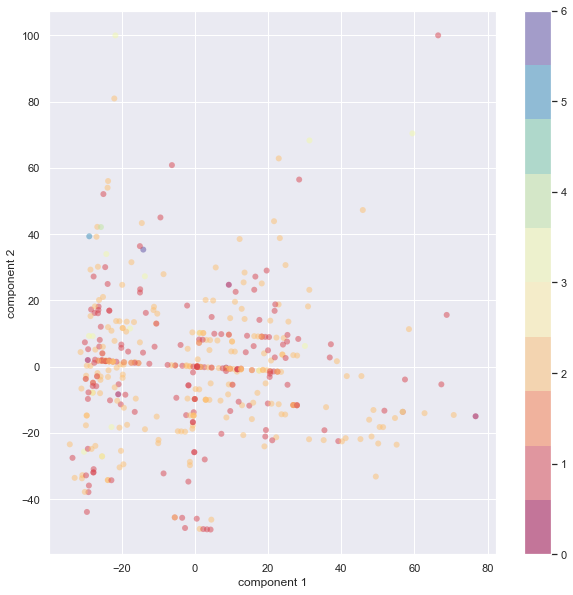

In [90]:
plt.figure(figsize=(10,10))
plt.scatter(df_prep_pca_projected[:, 0], df_prep_pca_projected[:, 1],
            c=cmaparr, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

Unsupervised Learning Techniques
---

**Lesson 1: K Means**

In [26]:
# Generate some data
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)
X = X[:, ::-1] # flip axes for better plotting

C:\Users\andre\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


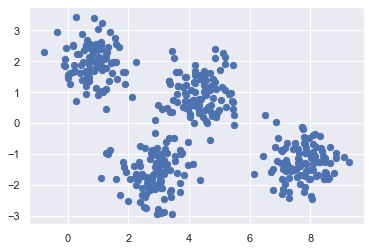

In [27]:
plt.scatter(X[:, 0], X[:, 1], s=40, cmap='viridis');

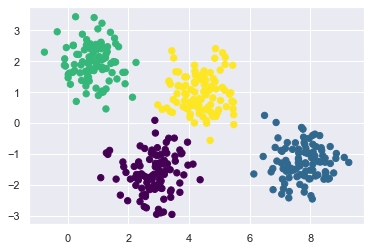

In [28]:
from sklearn.cluster import KMeans
kmeans = KMeans(4, random_state=0)
#km = kmeans.fit(X)
#km.predict(X)
labels = kmeans.fit(X).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

In [29]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1, color='red'))

In [41]:
kmeans.cluster_centers_

array([[-2.6602352 ,  1.66181725],
       [ 4.91573177, -0.68578313],
       [-0.33125011,  0.66920494],
       [ 1.20275425, -3.95515801],
       [-4.55398763, -0.84136208],
       [ 0.08780514,  3.63295918],
       [ 2.13303973,  1.64476307],
       [ 4.16883372,  5.5971676 ],
       [-1.84228944, -1.3480722 ],
       [ 1.69354248, -1.51462751]])

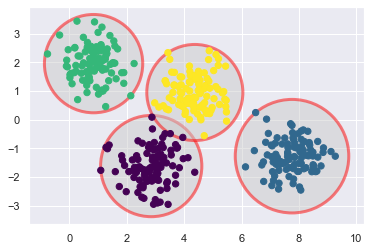

In [30]:
kmeans = KMeans(n_clusters=4, random_state=256)
plot_kmeans(kmeans, X)

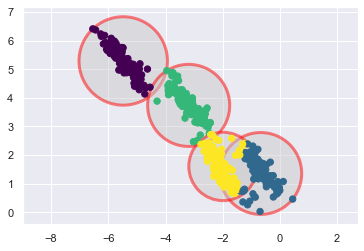

In [32]:
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))

kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X_stretched)

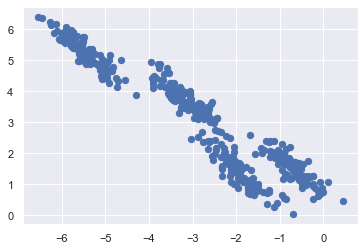

In [33]:
plt.scatter(X_stretched[:, 0], X_stretched[:, 1], s=40);

**Lesson 2: Generalized Mixture Models**

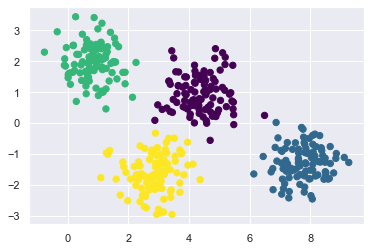

In [34]:
from sklearn.mixture import GaussianMixture as GMM
gmm = GMM(n_components=4).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

In [35]:
probs = gmm.predict_proba(X)
print(probs[:5].round(3))

[[0.537 0.463 0.    0.   ]
 [0.    0.    0.    1.   ]
 [0.    0.    0.    1.   ]
 [1.    0.    0.    0.   ]
 [0.    0.    0.    1.   ]]


In [36]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

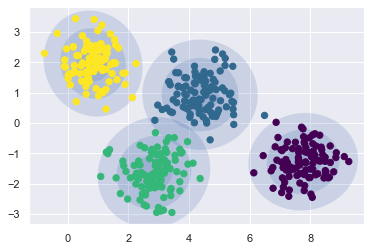

In [37]:
gmm = GMM(n_components=4, random_state=42)
plot_gmm(gmm, X)

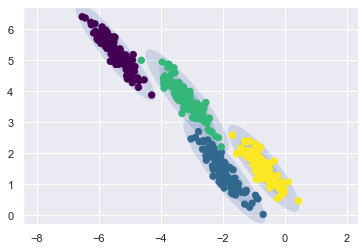

In [38]:
gmm = GMM(n_components=4, covariance_type='full', random_state=42)
plot_gmm(gmm, X_stretched)

**Lesson 3: Combining PCA and Kmeans**

Automatically created module for IPython interactive environment
n_digits: 10, 	 n_samples 1797, 	 n_features 64
__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.17s	69510	0.610	0.657	0.633	0.481	0.629	0.144
random   	0.13s	69907	0.633	0.674	0.653	0.518	0.649	0.143
PCA-based	0.02s	70768	0.668	0.695	0.681	0.558	0.678	0.127
__________________________________________________________________________________


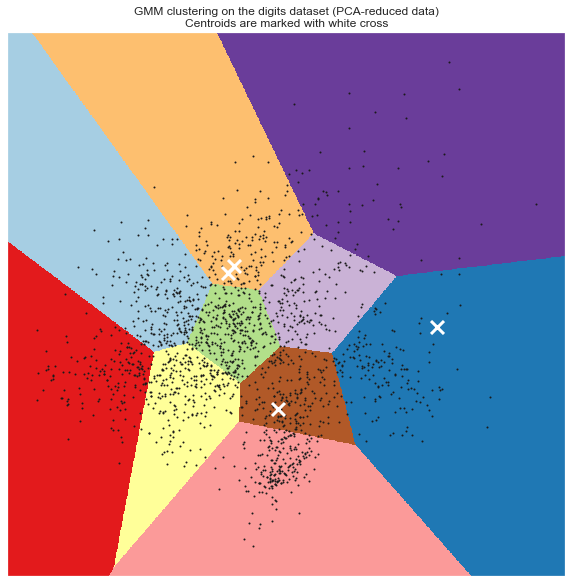

In [39]:
print(__doc__)

from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn import mixture
n_clusters=10
#cluster_model = KMeans(n_clusters, n_init=120)
gmm_cluster_model = mixture.GaussianMixture(n_components=10, covariance_type='full', max_iter = 300)

np.random.seed(42)

digits = load_digits()
data = scale(digits.data)

n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target

sample_size = 179

print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))


print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')


def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_,
                                                average_method='arithmetic'),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=10),
              name="k-means++", data=data)

bench_k_means(KMeans(init='random', n_clusters=n_digits, n_init=10),
              name="random", data=data)

# in this case the seeding of the centers is deterministic, hence we run the
# kmeans algorithm only once with n_init=1
pca = PCA(n_components=n_digits).fit(data)
bench_k_means(KMeans(init=pca.components_, n_clusters=n_digits, n_init=1),
              name="PCA-based",
              data=data)
print(82 * '_')

# #############################################################################
# Visualize the results on PCA-reduced data

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10,10))
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = np.empty(shape=(gmm.n_components, X.shape[1]))
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('GMM clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

**Lesson 4: Combining PCA and Mixture Models**

Automatically created module for IPython interactive environment
__________________________________________________________________________________


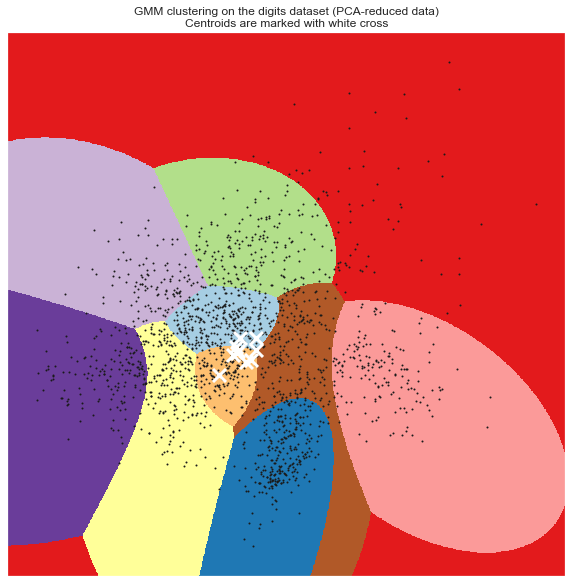

In [40]:
print(__doc__)

from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

np.random.seed(42)

digits = load_digits()
data = scale(digits.data)

n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target

sample_size = 179

# print("n_digits: %d, \t n_samples %d, \t n_features %d"
#       % (n_digits, n_samples, n_features))


# print(82 * '_')
# print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')


def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_,
                                                average_method='arithmetic'),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

# bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=10),
#               name="k-means++", data=data)

# bench_k_means(KMeans(init='random', n_clusters=n_digits, n_init=10),
#               name="random", data=data)

# in this case the seeding of the centers is deterministic, hence we run the
# kmeans algorithm only once with n_init=1
pca = PCA(n_components=n_digits).fit(data)
# bench_k_means(KMeans(init=pca.components_, n_clusters=n_digits, n_init=1),
#               name="PCA-based",
#               data=data)
print(82 * '_')

# #############################################################################
# Visualize the results on PCA-reduced data

reduced_data = PCA(n_components=2).fit_transform(data)
#kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
gmm = GMM(n_components=n_digits).fit(reduced_data)


# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = gmm.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10,10))
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = np.empty(shape=(gmm.n_components, X.shape[1]))
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('GMM clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()